## Enunciado

> Considere la información del proyecto cuya información aparece en la tabla adjunta:
> 1. ¿Cuál es la probabilidad de terminar el proyecto entre 7 y 9 periodos?
> 2. Indique cuales serían las actuaciones a llevar a cabo para reducir con mínimo sobrecoste la duración media del proyecto a 6 periodos.
> 3. Indique cuales serían las actuaciones para poder ejecutar el proyecto con un límite en los recursos de 8 recursos por periodo durante los primeros cuatro periodos.
> 4. Calcule el valor del CPI y del SPI para el punto de control de 8 periodos.


In [1]:
!apt install libgraphviz-dev              > /dev/null
%pip install pygraphviz "pandas[excel]"   > /dev/null
%pip install numpyarray_to_latex          > /dev/null

repo_url = 'https://github.com/mcasl/pmULE'
repo_name = "pmULE"

import os, sys

if not os.path.exists(repo_name):
    print(f"Cloning repository '{repo_name}'...")
    !git clone {repo_url}
    print("Repository cloned successfully!")
else:
    print(f"Good! No need to download '{repo_name}' again.")

from google.colab import files

# To find local version of the library
sys.path.append('pmULE/src')

from pmule import PredecessorTable, ProjectGraph



Cloning repository 'pmULE'...
Cloning into 'pmULE'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 254 (delta 31), reused 7 (delta 2), pack-reused 191 (from 1)
Receiving objects: 100% (254/254), 9.69 MiB | 22.45 MiB/s, done.
Resolving deltas: 100% (132/132), done.
Repository cloned successfully!


In [2]:
# Alargamos el ancho de las celdas al 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, duracion, duracion_tope, desviación, coste_planificado, coste_real, duracion_real, realizado, cur, recursos
     ('A',      '---  ',       2,         1,              0.2,         60,              80,          2,           100,   80,    4 ),
     ('B',      'A    ',       2,         1,              0.3,         70,              60,          2,            80,   10,    2 ),
     ('C',      'B    ',       3,         1,              0.4,         50,               0,          0,             0,   40,    1 ),
     ('D',      '---  ',       4,         3,              0.5,         40,              50,          5,           100,   20,    4 ),
     ('E',      'A    ',       1,         1,              0.1,         30,              30,          3,           100,   30,    3 ),
     ('F',      'D,E  ',       2,         1,              0.3,         10,              10,          3,            80,   40,    5 ),
     ('G',      '---  ',       1,         1,              0.1,         40,              50,          3,           100,   20,    4 ),
     ('H',      'G    ',       4,         2,              0.5,        110,             140,          4,            90,   50,    2 ),
     ('I',      'D    ',       1,         1,              0.1,         90,              70,          1,            50,   60,    3 ),
     ('J',      'H,I,K',       2,         1,              0.4,         50,               0,          0,             0,   70,    1 ),
     ('K',      'D,G  ',       2,         1,              0.2,         40,              30,          2,            60,   90,    2 ),
     ('L',      'H,K  ',       2,         1,              0.2,         30,               0,          0,             0,   10,    3 ),
] ,columns=['actividad', 'precedentes', 'duracion', 'duracion_tope', 'desviacion', 'coste_planificado', 'coste_real',
            'duracion_real', 'realizado', 'cur', 'recursos']).set_index('actividad')
datos_enunciado

,precedentes,duracion,duracion_tope,desviacion,coste_planificado,coste_real,duracion_real,realizado,cur,recursos
actividad,,,,,,,,,,
A,---,2,1,0.2,60,80,2,100,80,4
B,A,2,1,0.3,70,60,2,80,10,2
C,B,3,1,0.4,50,0,0,0,40,1
D,---,4,3,0.5,40,50,5,100,20,4
E,A,1,1,0.1,30,30,3,100,30,3
F,"D,E",2,1,0.3,10,10,3,80,40,5
G,---,1,1,0.1,40,50,3,100,20,4
H,G,4,2,0.5,110,140,4,90,50,2
I,D,1,1,0.1,90,70,1,50,60,3


## Solución
### Apartado 1

> ¿Cuál es la probabilidad de terminar el proyecto entre 7 y 9 semanas?


#### Duración media del proyecto

En pmule (project management at ULE) está el código que utilizamos para calcular los valores del PERT.

In [5]:
datos_proyecto = datos_enunciado.copy()
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='actividad', predecessor='precedentes')

In [6]:
prelaciones.display_immediate_linkage_matrix()

,A,B,C,D,E,F,G,H,I,J,K,L
activities,,,,,,,,,,,,
A,,,,,,,,,,,,
B,True,,,,,,,,,,,
C,,True,,,,,,,,,,
D,,,,,,,,,,,,
E,True,,,,,,,,,,,
F,,,,True,True,,,,,,,
G,,,,,,,,,,,,
H,,,,,,,True,,,,,
I,,,,True,,,,,,,,


La clase PertGraph permite visualizar el grafo PERT, el diagrama de Gantt así como realizar el cálculo de tiempos tempranos, tardíos y de las holguras totales.

##### Grafo PERT con numeración de nodos

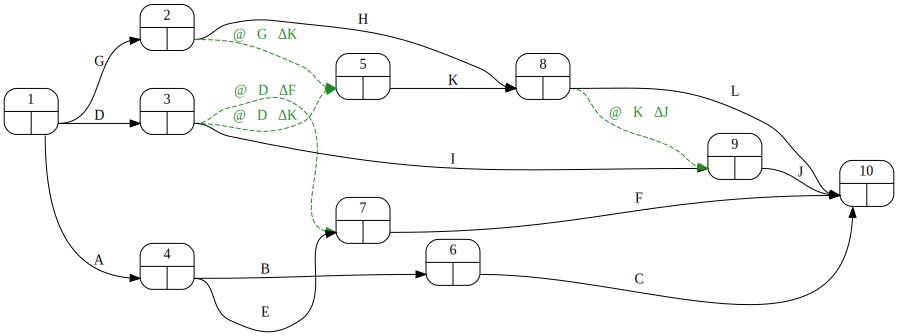

In [7]:
proyecto = prelaciones.create_project()
proyecto.pert(nodesep=0.3, ranksep=1)

##### Matriz de Zaderenko

In [8]:
proyecto.zaderenko(durations=datos_proyecto["duracion"])

,1,2,3,4,5,6,7,8,9,10,early
1,,1.0,4.0,2.0,,,,,,,0.0
2,,,,,0.0,,,4.0,,,1.0
3,,,,,0.0,,0.0,,1.0,,4.0
4,,,,,,2.0,1.0,,,,2.0
5,,,,,,,,2.0,,,4.0
6,,,,,,,,,,3.0,4.0
7,,,,,,,,,,2.0,4.0
8,,,,,,,,,0.0,2.0,6.0
9,,,,,,,,,,2.0,6.0
10,,,,,,,,,,,8.0


In [9]:
resultados_pert = proyecto.calculate_pert(durations=datos_proyecto["duracion"])
resultados_pert['nodes']

,early,late
1,0,0
2,1,2
3,4,4
4,2,3
5,4,4
6,4,5
7,4,6
8,6,6
9,6,6
10,8,8


##### Duración media del proyecto

La duración media del proyecto es:

In [10]:
duracion_media_proyecto = proyecto.duration(durations=datos_proyecto["duracion"])
duracion_media_proyecto

8

#### Varianza de la duración del proyecto
Para determinar la varianza de la duración del proyecto es necesario determinar la varianza de cada rama del camino crítico.

##### Holguras

In [11]:
resultados_pert['activities']

,H_total
@∇D⤑ΔF,2
@∇D⤑ΔK,0
@∇G⤑ΔK,3
@∇K⤑ΔJ,0
A,1
B,1
C,1
D,0
E,3
F,2


##### Camino crítico

In [12]:
camino_critico = proyecto.critical_path(durations=datos_proyecto["duracion"])
camino_critico

{'Route_7': ['D', '@∇D⤑ΔK', 'K', 'L'],
 'Route_8': ['D', '@∇D⤑ΔK', 'K', '@∇K⤑ΔJ', 'J']}

##### Grafo PERT con indicación del camino crítico

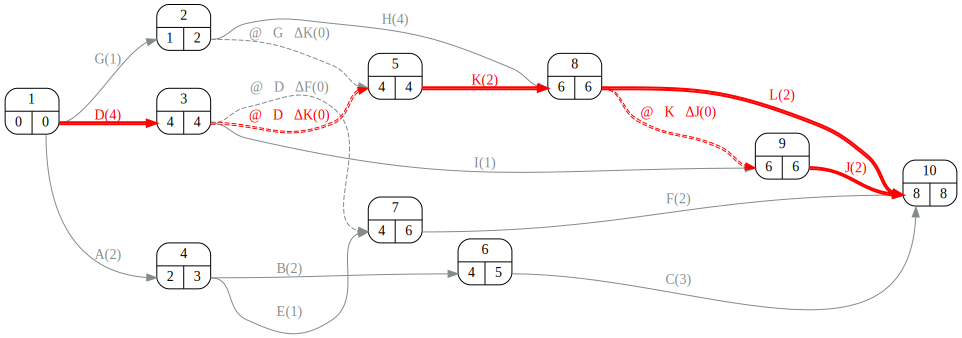

In [13]:
proyecto.pert(durations=datos_proyecto["duracion"], nodesep=0.3, ranksep=1)

##### Desviación del proyecto

A la vista del grafo PERT el camino crítico se compone de 2 ramas.

In [14]:
datos_proyecto['varianza'] = datos_proyecto.eval('desviacion ** 2')
desviacion_proyecto = proyecto.standard_deviation(durations=datos_proyecto['duracion'],
                                                  variances=datos_proyecto['varianza'])
desviacion_proyecto

Variance path: Route_7 : 0.33000000000000007
Variance path: Route_8 : 0.45000000000000007
Project duration variance: 0.45000000000000007
Project duration standard deviation: 0.6708203932499369


0.6708203932499369

#### Probabilidad de terminar entre 7 y 9 periodos

In [15]:
import scipy
from scipy.stats import norm

probabilidad_de_terminar_antes_de_9 = norm.cdf(9, loc=duracion_media_proyecto, scale=desviacion_proyecto)
probabilidad_de_terminar_antes_de_7 = norm.cdf(7, loc=duracion_media_proyecto, scale=desviacion_proyecto)

probabilidad_de_terminar_entre_7_y_9 = probabilidad_de_terminar_antes_de_9 - probabilidad_de_terminar_antes_de_7
probabilidad_de_terminar_entre_7_y_9 * 100

86.39628718858563

### Apartado 2
> Indique cuales serían las actuaciones a llevar a cabo para reducir con mínimo sobrecoste la duración media del proyecto a 6 periodos.

In [16]:
ackoff, best_option, duration, available =proyecto.ackoff(durations=datos_proyecto['duracion'],
                                                          min_durations=datos_proyecto['duracion_tope'],
                                                          costs=datos_proyecto['cur'],
                                                          reduction=2)
ackoff

D shape (12,)
Path matrix shape (10, 12)


Step: 0,	 Best option: ['D'], 	 Cost: 20, 	 Critical paths: ['Route_7', 'Route_8']
Step: 1,	 Best option: ['L', 'J', 'B'], 	 Cost: 90, 	 Critical paths: ['Route_1', 'Route_2', 'Route_7', 'Route_8', 'Route_9']





,A,B,C,D,E,F,G,H,I,J,K,L,0,1,2
Route_1,,,,,,,20.0,50.0,,,,10.0,7.0,7.0,6.0
Route_2,,,,,,,20.0,50.0,,70.0,,,7.0,7.0,6.0
Route_3,,,,,,,20.0,,,,90.0,10.0,5.0,5.0,4.0
Route_4,,,,,,,20.0,,,70.0,90.0,,5.0,5.0,4.0
Route_5,,,,20.0,,,,,60.0,70.0,,,7.0,6.0,5.0
Route_6,,,,20.0,,40.0,,,,,,,6.0,5.0,5.0
Route_7,,,,20.0,,,,,,,90.0,10.0,8.0,7.0,6.0
Route_8,,,,20.0,,,,,,70.0,90.0,,8.0,7.0,6.0
Route_9,80.0,10.0,40.0,,,,,,,,,,7.0,7.0,6.0
Route_10,80.0,,,,30.0,40.0,,,,,,,5.0,5.0,5.0


### Apartado 3
> Indique cuales serían las actuaciones para poder ejecutar el proyecto con un límite en los recursos de 8 recursos por periodo durante los primeros cuatro periodos.

Para responder este apartado es necesario representar la demanda de recursos a lo largo del tiempo.

In [17]:
proyecto_asignacion = proyecto.copy()
proyecto_asignacion.gantt(datos_proyecto,
                          'duracion',
                          'recursos',
                          total='fila',
                          holguras = True)

,1,2,3,4,5,6,7,8,H_total
A,4,4,,,,,,,1.000000
B,,,2,2,,,,,1.000000
C,,,,,1,1,1,,1.000000
D,4,4,4,4,,,,,0.000000
E,,,3,,,,,,3.000000
F,,,,,5,5,,,2.000000
G,4,,,,,,,,1.000000
H,,2,2,2,2,,,,1.000000
I,,,,,3,,,,1.000000
J,,,,,,,1,1,0.000000


La demanda de recursos actual infringe el límite impuesto. Es necesario aplicar el algoritmo de asignación.

#### Algoritmo de asignación

 El primer periodo problemático es el 1.

##### Asignación periodo 1

De las actividades inicialmente programadas para el periodo 1 la actividad D es crítica y se programa consumiendo 4 recursos. Las actividades A y G empatan en holgura y por tanto se programa la más corta (G) desplazando la actividad A.

In [18]:
duracion_y_recursos = datos_proyecto[['duracion', 'recursos']]
duracion_y_recursos = proyecto_asignacion.desplazar(duracion_y_recursos, 'duracion', 'recursos', A = 1)

Suma de cuadrados: 695.0 



,1,2,3,4,5,6,7,8,H_total
A,,4.000000,4.000000,,,,,,0.000000
B,,,,2.000000,2.000000,,,,0.000000
C,,,,,,1.000000,1.000000,1.000000,0.000000
D,4.000000,4.000000,4.000000,4.000000,,,,,0.000000
E,,,,3.000000,,,,,2.000000
F,,,,,5.000000,5.000000,,,2.000000
G,4.000000,,,,,,,,1.000000
H,,2.000000,2.000000,2.000000,2.000000,,,,1.000000
I,,,,,3.000000,,,,1.000000
J,,,,,,,1.000000,1.000000,0.000000


##### Asignación periodo 2

De las actividades inicialmente programadas para el periodo 2 la actividad D ya se está ejecutando y no se interrumpe. La actividad A se ha convertido en crítica y por tanto se desplaza la actividad H.

In [19]:
duracion_y_recursos = proyecto_asignacion.desplazar(duracion_y_recursos, 'duracion', 'recursos', H = 1)

Suma de cuadrados: 695.0 



,1,2,3,4,5,6,7,8,H_total
A,,4.000000,4.000000,,,,,,0.000000
B,,,,2.000000,2.000000,,,,0.000000
C,,,,,,1.000000,1.000000,1.000000,0.000000
D,4.000000,4.000000,4.000000,4.000000,,,,,0.000000
E,,,,3.000000,,,,,2.000000
F,,,,,5.000000,5.000000,,,2.000000
G,4.000000,,,,,,,,0.000000
H,,,2.000000,2.000000,2.000000,2.000000,,,0.000000
I,,,,,3.000000,,,,1.000000
J,,,,,,,1.000000,1.000000,0.000000


##### Asignación periodo 3

Durante el periodo tres se continuan ejecutando las actividades en ejecución A y D.

In [20]:
duracion_y_recursos = proyecto_asignacion.desplazar(duracion_y_recursos, 'duracion', 'recursos', H = 1)

Suma de cuadrados: 659.0 



,1,2,3,4,5,6,7,8,9,H_total
A,,4.000000,4.000000,,,,,,,1.000000
B,,,,2.000000,2.000000,,,,,1.000000
C,,,,,,1.000000,1.000000,1.000000,,1.000000
D,4.000000,4.000000,4.000000,4.000000,,,,,,1.000000
E,,,,3.000000,,,,,,3.000000
F,,,,,5.000000,5.000000,,,,3.000000
G,4.000000,,,,,,,,,0.000000
H,,,,2.000000,2.000000,2.000000,2.000000,,,0.000000
I,,,,,3.000000,,,,,2.000000
J,,,,,,,,1.000000,1.000000,0.000000


##### Asignación periodo 4

Durante el periodo cuatro D continua su ejecución. Atendiendo a las holguras se programa la ejecución para este periodo de H y B, desplazando E.

In [21]:
duracion_y_recursos = proyecto_asignacion.desplazar(duracion_y_recursos, 'duracion', 'recursos', E = 1)

Suma de cuadrados: 605.0 



,1,2,3,4,5,6,7,8,9,H_total
A,,4.000000,4.000000,,,,,,,1.000000
B,,,,2.000000,2.000000,,,,,1.000000
C,,,,,,1.000000,1.000000,1.000000,,1.000000
D,4.000000,4.000000,4.000000,4.000000,,,,,,1.000000
E,,,,,3.000000,,,,,2.000000
F,,,,,,5.000000,5.000000,,,2.000000
G,4.000000,,,,,,,,,0.000000
H,,,,2.000000,2.000000,2.000000,2.000000,,,0.000000
I,,,,,3.000000,,,,,2.000000
J,,,,,,,,1.000000,1.000000,0.000000


### Apartado 4
> Calcule el valor del CPI y del SPI para el punto de control de 8 periodos.


In [22]:
PV = datos_proyecto['coste_planificado'].sum()
PV

620

In [23]:
EV = datos_proyecto.eval('coste_planificado * realizado / 100').sum()
EV

402.0

In [24]:
AC = datos_proyecto['coste_real'].sum()
AC

520

In [25]:
CPI = EV/AC
CPI

0.7730769230769231

In [26]:
SPI=EV/PV
SPI

0.6483870967741936